# **Lesson 16 Homework**

# **IMPORTS**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Automatically adjust the width
pd.set_option('display.max_colwidth', None)  # Unlimited column width
pd.set_option('display.max_rows', None)  # Display all rows

# **BASIC DATA ANALYSIS**

### **LOAD DATA**

In [48]:
# Load the data into a dataframe
#data_set = pd.read_csv("wine_quality.csv")
data_set = pd.read_csv("titanic.csv")

# Identify numerical columns, Global Context for reuse
numerical_cols = data_set.select_dtypes(include=['float64', 'int64']).columns

# Get the categorical columns, Global Context for reuse
categorical_cols = data_set.select_dtypes(include=['object', 'category']).columns

### **INSPECT HEAD**

In [49]:
# Look at the first 5 entries
data_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


### **INSPECT TAIL**

In [50]:
# Look at the last 5 entries
data_set.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1


### **INSPECT COLUMNS**

In [51]:
# Show the columns
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### **INSPECT SHAPE**

In [52]:
# Show the shape
data_set.shape

(418, 12)

### **SUMMARY STATISTICS**

In [53]:
# Print out a summary of the dataset

data_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.385167
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.487218
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


### **ESTABLISH MEAN**

In [54]:
# Calculate the mean for each col and store in new dataframe for visualing
mean_df = pd.DataFrame()

for col in numerical_cols:
    # Calculate the mean of the column
    col_mean = data_set[col].mean()

    # Store result in mean df
    mean_df[col] = [col_mean]

print(mean_df)

   PassengerId   Pclass       Age     SibSp     Parch       Fare  Survived
0       1100.5  2.26555  30.27259  0.447368  0.392344  35.627188  0.385167


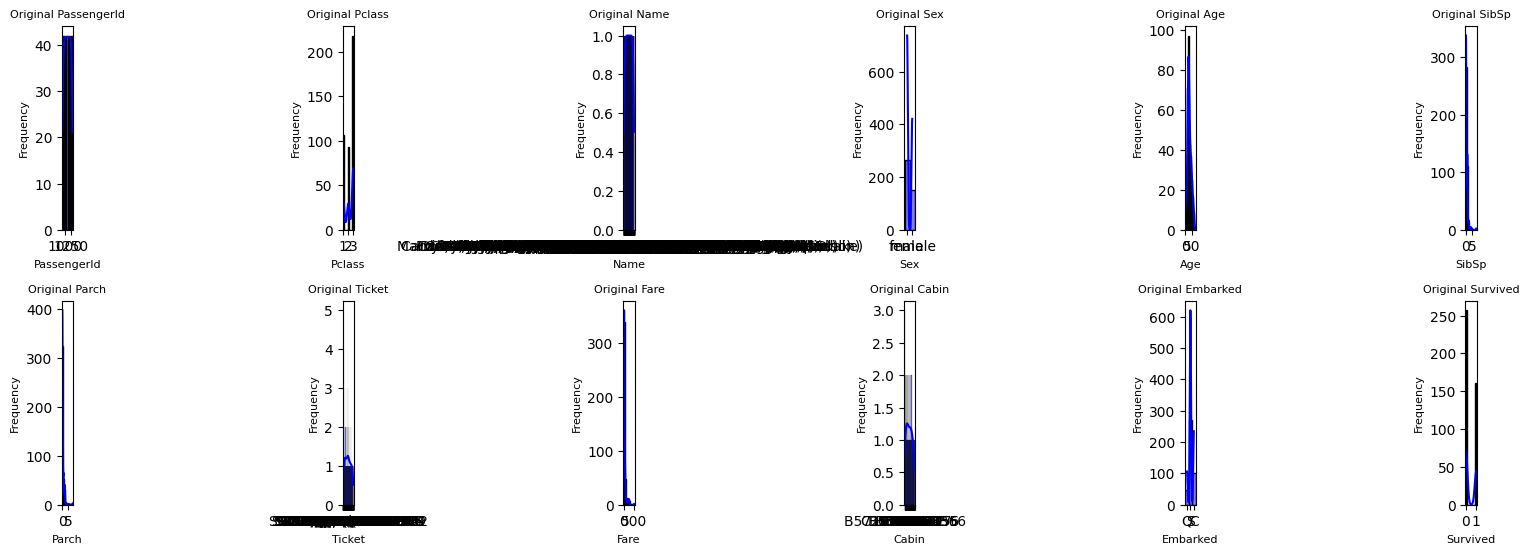

In [55]:
# Plot the original data
plt.figure(figsize=(15, 8))

for i, column in enumerate(data_set):
    plt.subplot(3, len(data_set.columns)//2, i+1)
    sns.histplot(data_set[column], kde=True, color='blue', bins=10)
    plt.title(f'Original {column}', fontsize=8)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

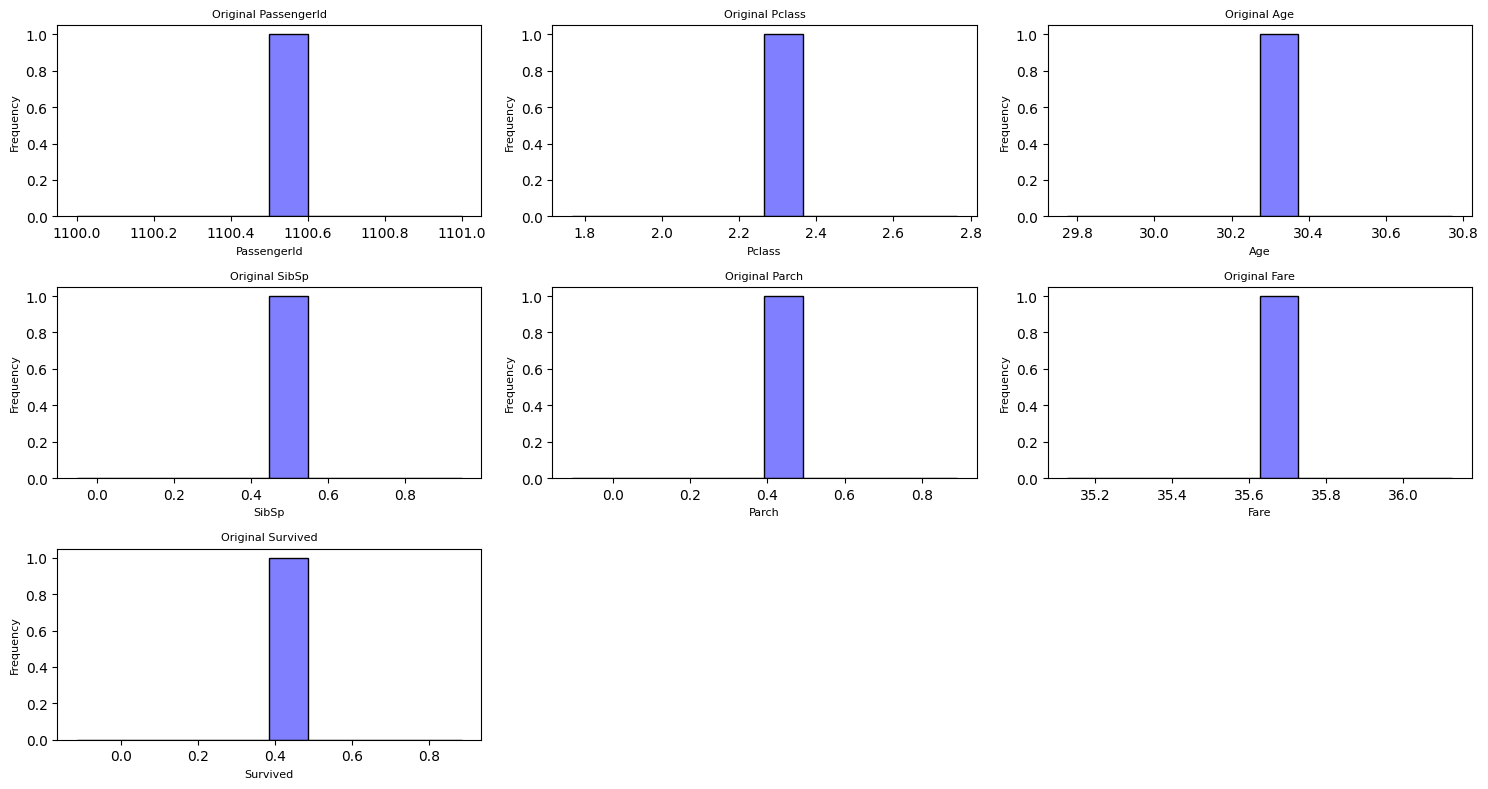

In [56]:
# Plot the mean data
plt.figure(figsize=(15, 8))

# A hist is probably not the correct plot, try again
for i, column in enumerate(mean_df):
    plt.subplot(3, len(mean_df.columns)//2, i+1)
    sns.histplot(mean_df[column], kde=True, color='blue', bins=10)
    plt.title(f'Original {column}', fontsize=8)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

### **ESTABLISH MODE**

In [57]:
# Calculate the mode for each col and store in new dataframe for visualing
mode_df = pd.DataFrame()

for col in data_set.columns:
    # Calculate the mode of the column
    col_mode = data_set[col].mode().values[0]

    # Store result in mean df
    mode_df[col] = [col_mode]

print(mode_df)

   PassengerId  Pclass                           Name   Sex   Age  SibSp  Parch    Ticket  Fare  \
0          892       3  Abbott, Master. Eugene Joseph  male  21.0      0      0  PC 17608  7.75   

             Cabin Embarked  Survived  
0  B57 B59 B63 B66        S         0  


### **ESTABLISH VARIANCE**

In [58]:
# Calculate the variance for each numerical col and store in new dataframe for visualing
var_df = pd.DataFrame()

# Loop through numerical columns and print the variance
for col in numerical_cols:
    # Calculate the var of each numerical col
    col_var = data_set[col].var()

    # Store the result in the var df
    var_df[col] = [col_var]

print(var_df)

    PassengerId   Pclass         Age     SibSp     Parch         Fare  Survived
0  14595.166667  0.70869  201.106695  0.804178  0.963203  3125.657074  0.237381


### **ESTABLISH STANDARD DEVIATION**

In [59]:
# Calculate the std dev for each numerical col and store in new dataframe for visualing
std_dev_df = pd.DataFrame()

# Loop through numerical columns and print the variance
for col in numerical_cols:
    # Calculate the std_dev of each numerical col
    col_std_dev = data_set[col].std()

    # Store the result in the var df
    std_dev_df[col] = [col_std_dev]

print(std_dev_df)

   PassengerId    Pclass        Age    SibSp     Parch       Fare  Survived
0   120.810458  0.841838  14.181209  0.89676  0.981429  55.907576  0.487218


### **ESTABLISH MIN/MAX, QUARTILES, and IQR**

In [60]:
# Establish Min, Max. and Quartiles

summary_stats = pd.DataFrame(index=['Min', 'Max', 'Q1', 'Q2', 'Q3', 'IQR'])

for col in numerical_cols:
    summary_stats[col] = [
        data_set[col].min(),
        data_set[col].max(),
        data_set[col].quantile(0.25),
        data_set[col].quantile(0.5),
        data_set[col].quantile(0.75),
        data_set[col].quantile(0.75) - data_set[col].quantile(0.25)]

print("Summary Statistics:\n", summary_stats)

Summary Statistics:
      PassengerId  Pclass    Age  SibSp  Parch      Fare  Survived
Min       892.00     1.0   0.17    0.0    0.0    0.0000       0.0
Max      1309.00     3.0  76.00    8.0    9.0  512.3292       1.0
Q1        996.25     1.0  21.00    0.0    0.0    7.8958       0.0
Q2       1100.50     3.0  27.00    0.0    0.0   14.4542       0.0
Q3       1204.75     3.0  39.00    1.0    0.0   31.5000       1.0
IQR       208.50     2.0  18.00    1.0    0.0   23.6042       1.0


### **CHECK FOR MISSING VALUES**

In [61]:
# Check for missing values

# In the whole dataset
print("Missing values in the dataset:")
print(data_set.isnull().sum())

# In each col
print("\nMissing values per column:")
for col in data_set.columns:
    missing_count = data_set[col].isnull().sum()
    print(f"Column '{col}' has {missing_count} missing values.")

# Calculate the percentage of missing values per column
print("\nPercentage of missing values per column:")
for col in data_set.columns:
    total_count = len(data_set[col])
    missing_count = data_set[col].isnull().sum()
    missing_percentage = (missing_count / total_count) * 100
    print(f"Column '{col}' has {missing_percentage:.2f}% missing values.")

Missing values in the dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

Missing values per column:
Column 'PassengerId' has 0 missing values.
Column 'Pclass' has 0 missing values.
Column 'Name' has 0 missing values.
Column 'Sex' has 0 missing values.
Column 'Age' has 86 missing values.
Column 'SibSp' has 0 missing values.
Column 'Parch' has 0 missing values.
Column 'Ticket' has 0 missing values.
Column 'Fare' has 1 missing values.
Column 'Cabin' has 327 missing values.
Column 'Embarked' has 0 missing values.
Column 'Survived' has 0 missing values.

Percentage of missing values per column:
Column 'PassengerId' has 0.00% missing values.
Column 'Pclass' has 0.00% missing values.
Column 'Name' has 0.00% missing values.
Column 'Sex' has 0.00% missing values.
Column 'Age' has 20.57% missing val

### **IDENTIFY OUTLIERS**


For the 'PassengerId' column:
Number of outliers: 0


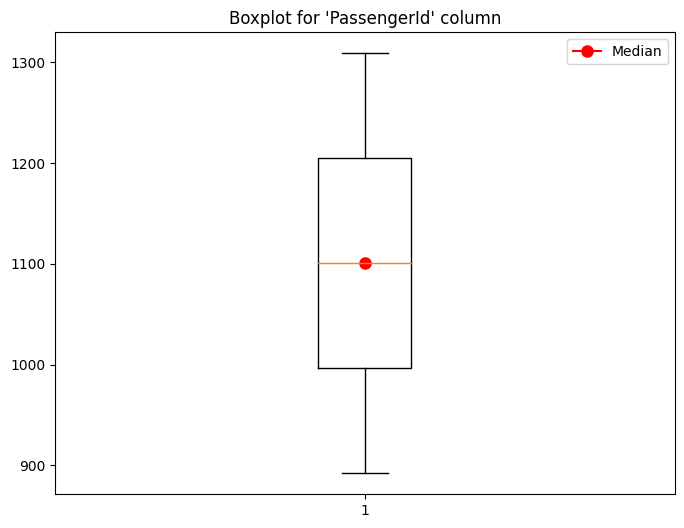


For the 'Pclass' column:
Number of outliers: 0


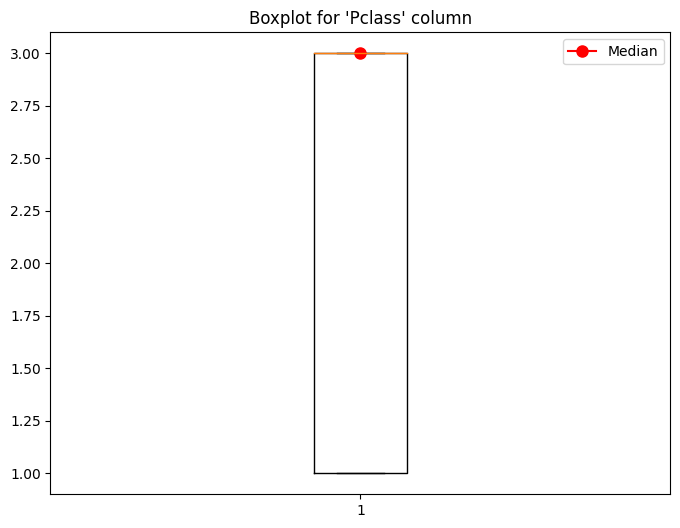


For the 'Age' column:
Number of outliers: 2
Outlier values:
[67. 76.]


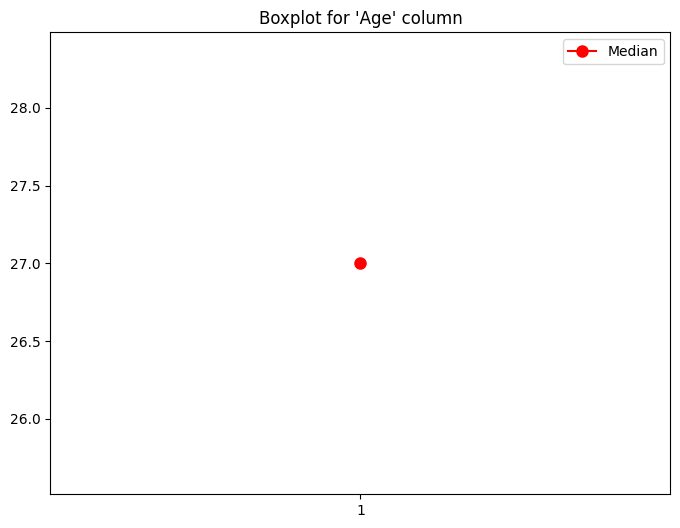


For the 'SibSp' column:
Number of outliers: 11
Outlier values:
[3 4 5 3 4 8 4 8 4 3 3]


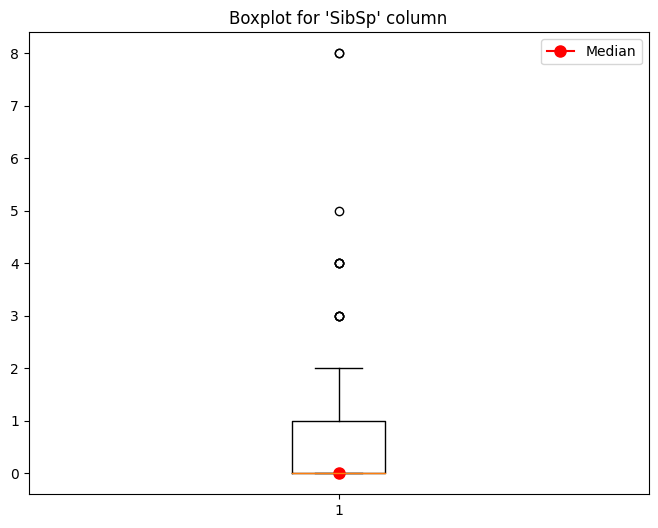


For the 'Parch' column:
Number of outliers: 94
Outlier values:
[1 1 1 1 3 1 2 2 1 2 1 2 1 2 4 1 1 2 1 1 1 4 6 2 3 1 1 2 2 2 1 1 2 5 2 3 2
 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 9 1
 1 1 2 2 2 1 9 1 1 2 2 1 1 2 1 1 1 1 1 1]


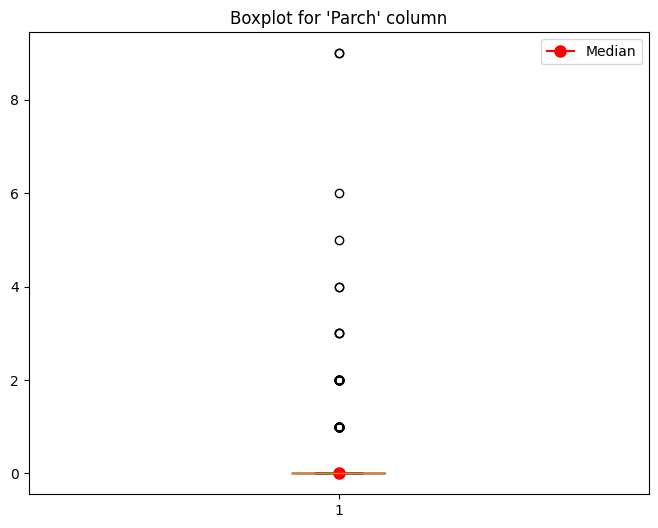


For the 'Fare' column:
Number of outliers: 55
Outlier values:
[ 82.2667 262.375   76.2917 263.     262.375  262.375  263.     211.5
 211.5    221.7792  78.85   221.7792  75.2417 151.55   262.375   83.1583
 221.7792  83.1583  83.1583 247.5208  69.55   134.5    227.525   73.5
 164.8667 211.5     71.2833  75.25   106.425  134.5    136.7792  75.2417
 136.7792  82.2667  81.8583 151.55    93.5    135.6333 146.5208 211.3375
  79.2     69.55   512.3292  73.5     69.55    69.55   134.5     81.8583
 262.375   93.5     79.2    164.8667 211.5     90.     108.9   ]


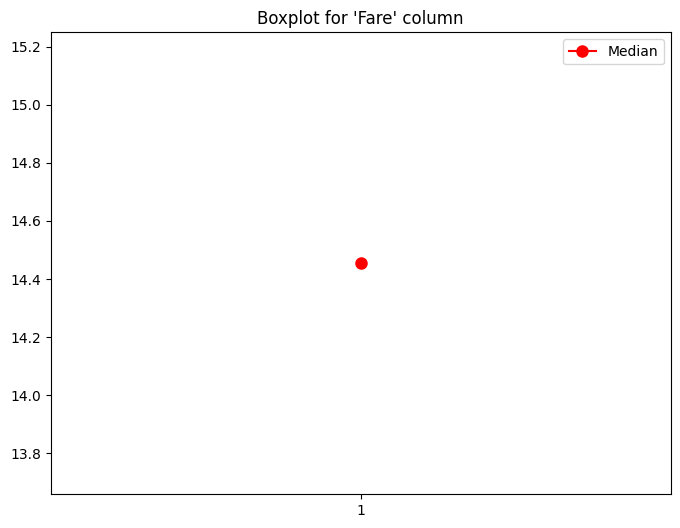


For the 'Survived' column:
Number of outliers: 0


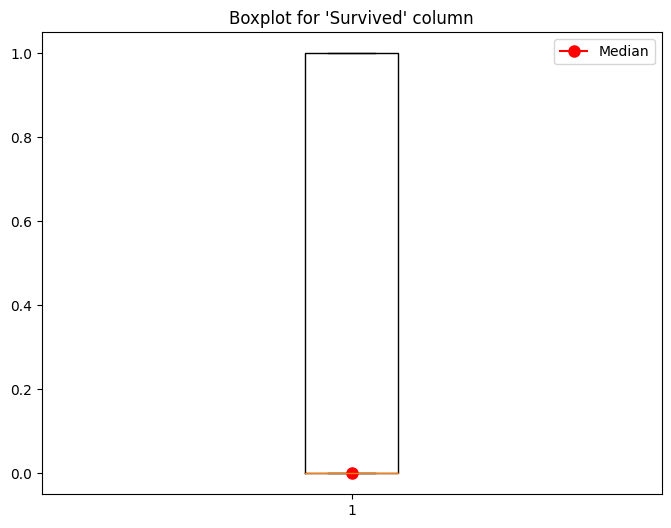

In [62]:
# Identify outliers

import numpy as np

lower_bounds_df = pd.DataFrame()
upper_bounds_df = pd.DataFrame()

# Loop through numerical columns and identify outliers
for col in numerical_cols:
    # Retrieve the quartiles from the summary_stats DataFrame
    col_q1 = summary_stats.loc['Q1', col]
    col_q3 = summary_stats.loc['Q3', col]
    col_iqr = summary_stats.loc['IQR', col]
    col_median = summary_stats.loc['Q2', col]  # Adding median (Q2) retrieval

    # Calculate lower and upper bounds for outlier detection
    lower_bound = col_q1 - (1.5 * col_iqr)
    upper_bound = col_q3 + (1.5 * col_iqr)
    outliers = data_set[(data_set[col] < lower_bound) | (data_set[col] > upper_bound)]
    num_outliers = len(outliers)

    # Print results
    print(f"\nFor the '{col}' column:")
    print(f"Number of outliers: {num_outliers}")

    if num_outliers > 0:
        print("Outlier values:")
        print(outliers[col].values)

    # Optionally, plot a boxplot to visualize outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data_set[col])
    # Add median line to the boxplot
    plt.plot(1, col_median, marker='o', markersize=8, color='red', label='Median')
    plt.title(f"Boxplot for '{col}' column")
    plt.legend()  # Add legend for median
    plt.show()

### **EXPLORE CORRELATIONS**

<ipython-input-63-b431a4c10a15>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_set.corr()


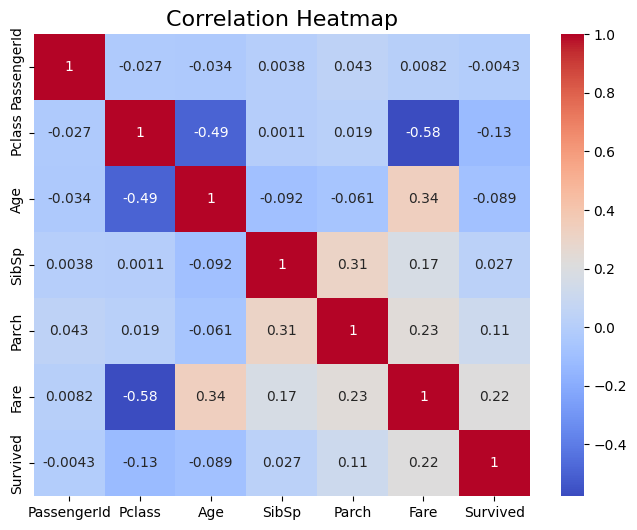

In [63]:
# Create a correlation matrix and interpret

'''
Interpreting the Correlation Heatmap:

Diagonal Elements: The diagonal elements will always be 1, as these represent the correlation of a variable with itself.

Color Scale: The color scale represents the strength and direction of the correlation.
             Typically, blue shades indicate negative correlations, and red shades indicate positive correlations. The deeper the color, the stronger the correlation.

Correlation Values: The numeric values in each cell represent the correlation coefficient between the corresponding row and column variables.

Highly Correlated Variables: Look for cells with deep red or blue colors, as these indicate strong positive or negative correlations, respectively.
                             For example, in the image above, we can see that 'SepalLengthCm' and 'SepalWidthCm' have a strong positive correlation (dark red cell).

Uncorrelated Variables: Cells with a light color (closer to white) indicate little or no correlation between the corresponding variables.

Redundant Features: If you find pairs of variables with a very high positive correlation (close to 1), it may indicate that one of these variables is redundant and could potentially be removed from the dataset.

Multicollinearity: In regression analysis, you should be cautious of highly correlated independent variables, as this can lead to multicollinearity issues.

Patterns: Look for patterns or clusters of correlated variables, which may provide insights into the underlying relationships in the data.
'''

correlation_matrix = data_set.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### **INVESTIGATE CATEGORICAL VARIABLES**

Categorical variables found: Name, Sex, Ticket, Cabin, Embarked

Investigating 'Name':
Kelly, Mr. James                                                   1
Carr, Miss. Jeannie                                                1
Dennis, Mr. William                                                1
Rosblom, Miss. Salli Helena                                        1
Touma, Miss. Maria Youssef                                         1
Fleming, Miss. Honora                                              1
Peacock, Master. Alfred Edward                                     1
Oreskovic, Miss. Jelka                                             1
Oxenham, Mr. Percy Thomas                                          1
Ware, Mr. John James                                               1
Faunthorpe, Mr. Harry                                              1
Parker, Mr. Clifford Richard                                       1
Bryhl, Miss. Dagmar Jenny Ingeborg                                 1
Saade, Mr. Jean 

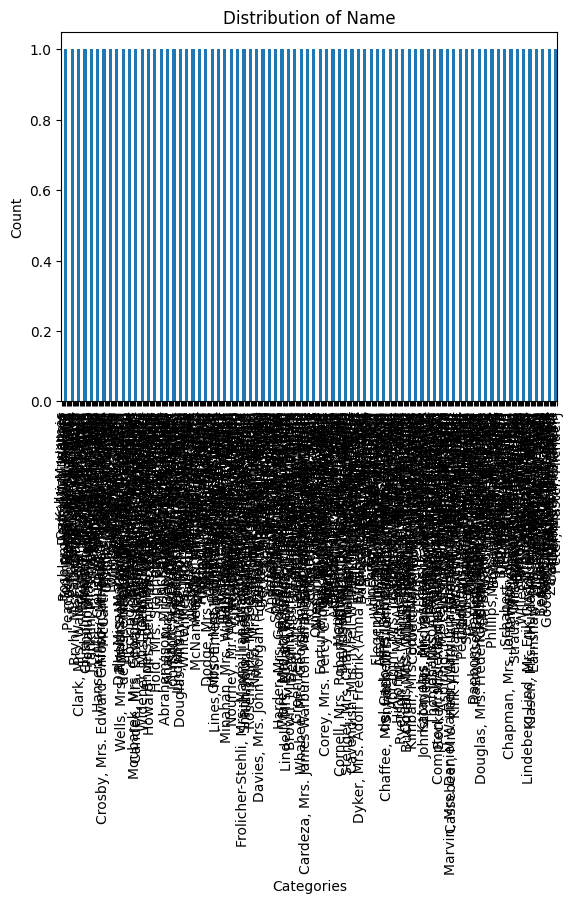


Relationship between 'Name' and 'Sex':
Sex                                                              female  male  All
Name                                                                              
Abbott, Master. Eugene Joseph                                         0     1    1
Abelseth, Miss. Karen Marie                                           1     0    1
Abelseth, Mr. Olaus Jorgensen                                         0     1    1
Abrahamsson, Mr. Abraham August Johannes                              0     1    1
Abrahim, Mrs. Joseph (Sophie Halaut Easu)                             1     0    1
Aks, Master. Philip Frank                                             0     1    1
Aldworth, Mr. Charles Augustus                                        0     1    1
Allison, Mr. Hudson Joshua Creighton                                  0     1    1
Andersen, Mr. Albert Karvin                                           0     1    1
Andersson, Miss. Ida Augusta Margareta         

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



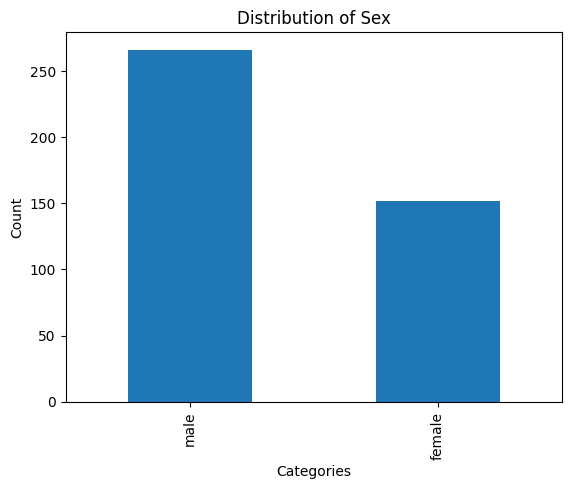


Relationship between 'Sex' and 'Name':
Name    Abbott, Master. Eugene Joseph  Abelseth, Miss. Karen Marie  Abelseth, Mr. Olaus Jorgensen  \
Sex                                                                                                 
female                              0                            1                              0   
male                                1                            0                              1   
All                                 1                            1                              1   

Name    Abrahamsson, Mr. Abraham August Johannes  Abrahim, Mrs. Joseph (Sophie Halaut Easu)  \
Sex                                                                                           
female                                         0                                          1   
male                                           1                                          0   
All                                            1                          

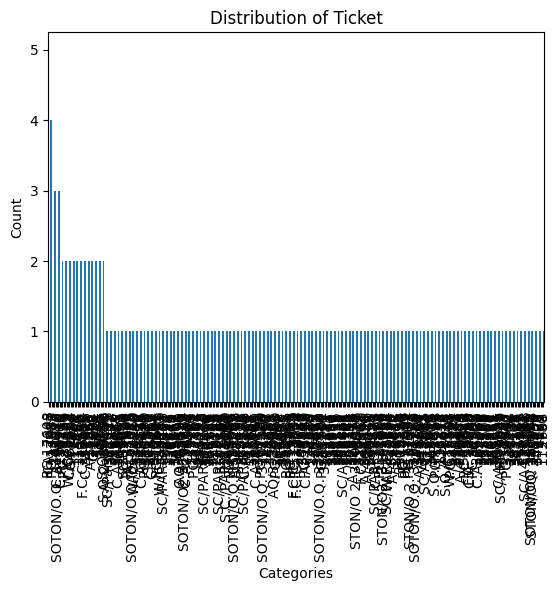


Relationship between 'Ticket' and 'Name':


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Cabin          A11  A18  A21  A29  A34  A9  B10  B11  B24  B26  B36  B41  B45  B51 B53 B55  \
Ticket                                                                                       
110469           0    0    0    0    0   0    0    0    0    0    0    0    0            0   
110489           0    0    0    0    0   0    0    0    0    0    0    0    0            0   
110813           0    0    0    0    0   0    0    0    0    0    0    0    0            0   
112058           0    0    0    0    0   0    0    0    0    0    0    0    0            0   
112901           0    0    0    0    0   0    0    0    0    1    0    0    0            0   
113038           0    0    0    0    0   0    0    1    0    0    0    0    0            0   
113044           0    0    0    0    0   0    0    0    0    0    0    0    0            0   
113054           0    0    1    0    0   0    0    0    0    0    0    0    0            0   
113503           0    0    0    0    0   0    0    0    0   

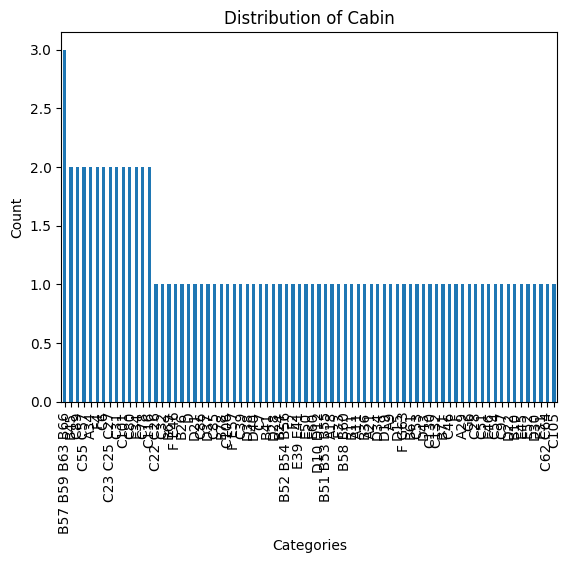


Relationship between 'Cabin' and 'Name':
Name             Abelseth, Mr. Olaus Jorgensen  Allison, Mr. Hudson Joshua Creighton  \
Cabin                                                                                  
A11                                          0                                     0   
A18                                          0                                     0   
A21                                          0                                     0   
A29                                          0                                     0   
A34                                          0                                     0   
A9                                           0                                     0   
B10                                          0                                     0   
B11                                          0                                     0   
B24                                          0                                

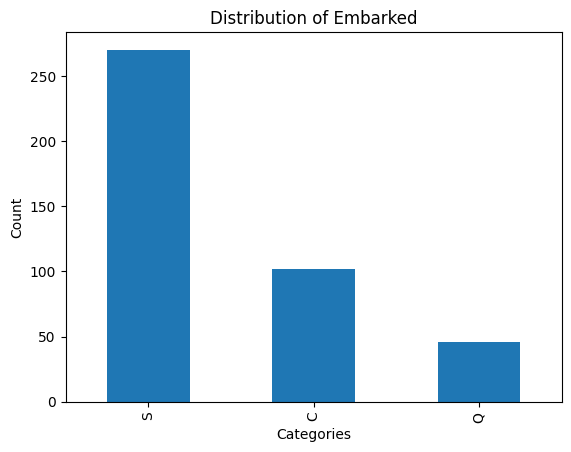


Relationship between 'Embarked' and 'Name':
Name      Abbott, Master. Eugene Joseph  Abelseth, Miss. Karen Marie  \
Embarked                                                               
C                                     0                            0   
Q                                     0                            0   
S                                     1                            1   
All                                   1                            1   

Name      Abelseth, Mr. Olaus Jorgensen  Abrahamsson, Mr. Abraham August Johannes  \
Embarked                                                                            
C                                     0                                         0   
Q                                     0                                         0   
S                                     1                                         1   
All                                   1                                         1   

Name      A

In [64]:
if len(categorical_cols) > 0:
    print(f"Categorical variables found: {', '.join(categorical_cols)}")

    for cat_var in categorical_cols:
        # Check if the categorical variable has any non-zero counts
        category_counts = data_set[cat_var].value_counts()
        if category_counts.sum() > 0:
            print(f"\nInvestigating '{cat_var}':")
            print(category_counts)

            # Plot the distribution
            category_counts.plot(kind='bar')
            plt.title(f'Distribution of {cat_var}')
            plt.xlabel('Categories')
            plt.ylabel('Count')
            plt.show()

            # Analyze the relationship between categorical variables (if multiple)
            if len(categorical_cols) > 1:
                other_cat_cols = [col for col in categorical_cols if col != cat_var]
                for other_cat in other_cat_cols:
                    print(f"\nRelationship between '{cat_var}' and '{other_cat}':")
                    crosstab = pd.crosstab(data_set[cat_var], data_set[other_cat], margins=True)
                    print(crosstab)
        else:
            print(f"Skipping '{cat_var}' as it has zero counts for all categories.")
else:
    print("No categorical variables found in the dataset.")

# **EXPLORATORY DATA ANAYLSIS (EDA)**




## **VISUAL TECHNIQUES**

### **HISTOGRAMS FOR DISTRIBUTIONS**

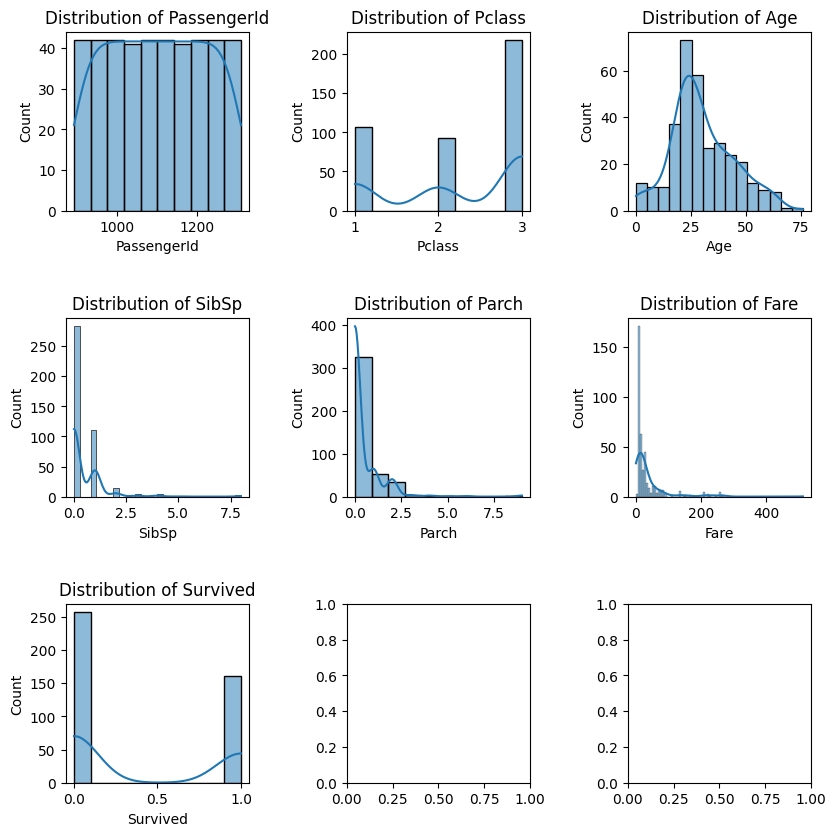

In [65]:
# Create a figure with subplots
num_rows = (len(numerical_cols) + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axs = plt.subplots(num_rows, 3, figsize=(9, 3 * num_rows))
axs = axs.flatten()

# Iterate over numerical columns and create histograms
for i, col in enumerate(numerical_cols):
    ax = axs[i]
    sns.histplot(data=data_set, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust spacing between subplots
fig.tight_layout(pad=3.0)

# Display the plots
plt.show()

### **BOXPLOTS FOR RELATIONSHIPS**

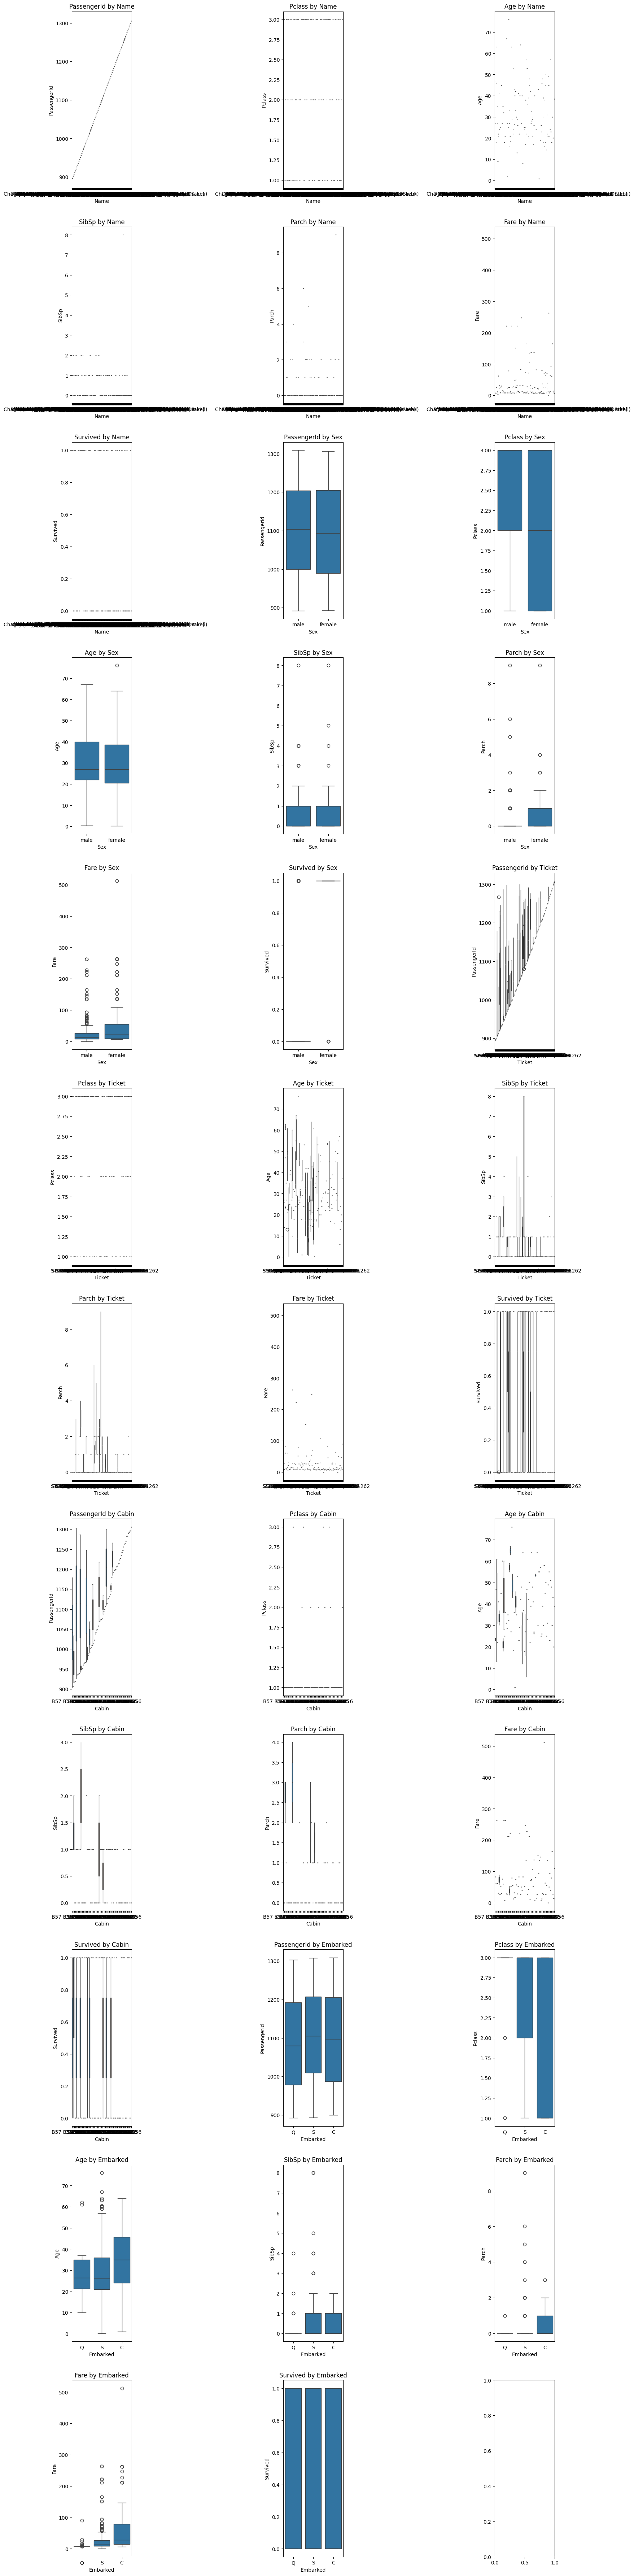

In [66]:
# Investigate any relationships between categorical and numerical variables

categorical_cols = data_set.select_dtypes(include=['object', 'category']).columns
numerical_cols = data_set.select_dtypes(include=['float64', 'int64']).columns

# Create a figure with subplots

if categorical_cols.size > 0 and numerical_cols.size > 0:
    num_rows = (len(categorical_cols) * len(numerical_cols) + 2) // 3
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axs = axs.flatten()
else:
    print("Number of categorical cols: ", categorical_cols.size)
    print("\nNumber of numerical cols: ", numerical_cols.size)

# Iterate over combinations of categorical and numerical columns
for i, (cat_col, num_col) in enumerate([(cat, num) for cat in categorical_cols for num in numerical_cols]):
    ax = axs[i]
    sns.boxplot(x=cat_col, y=num_col, data=data_set, ax=ax)
    ax.set_title(f'{num_col} by {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel(num_col)

# Adjust spacing between subplots
fig.tight_layout(pad=3.0)

# Display the plots
plt.show()

### **VIOLIN PLOTS FOR VISUALISING DISTRIBUTIONS**

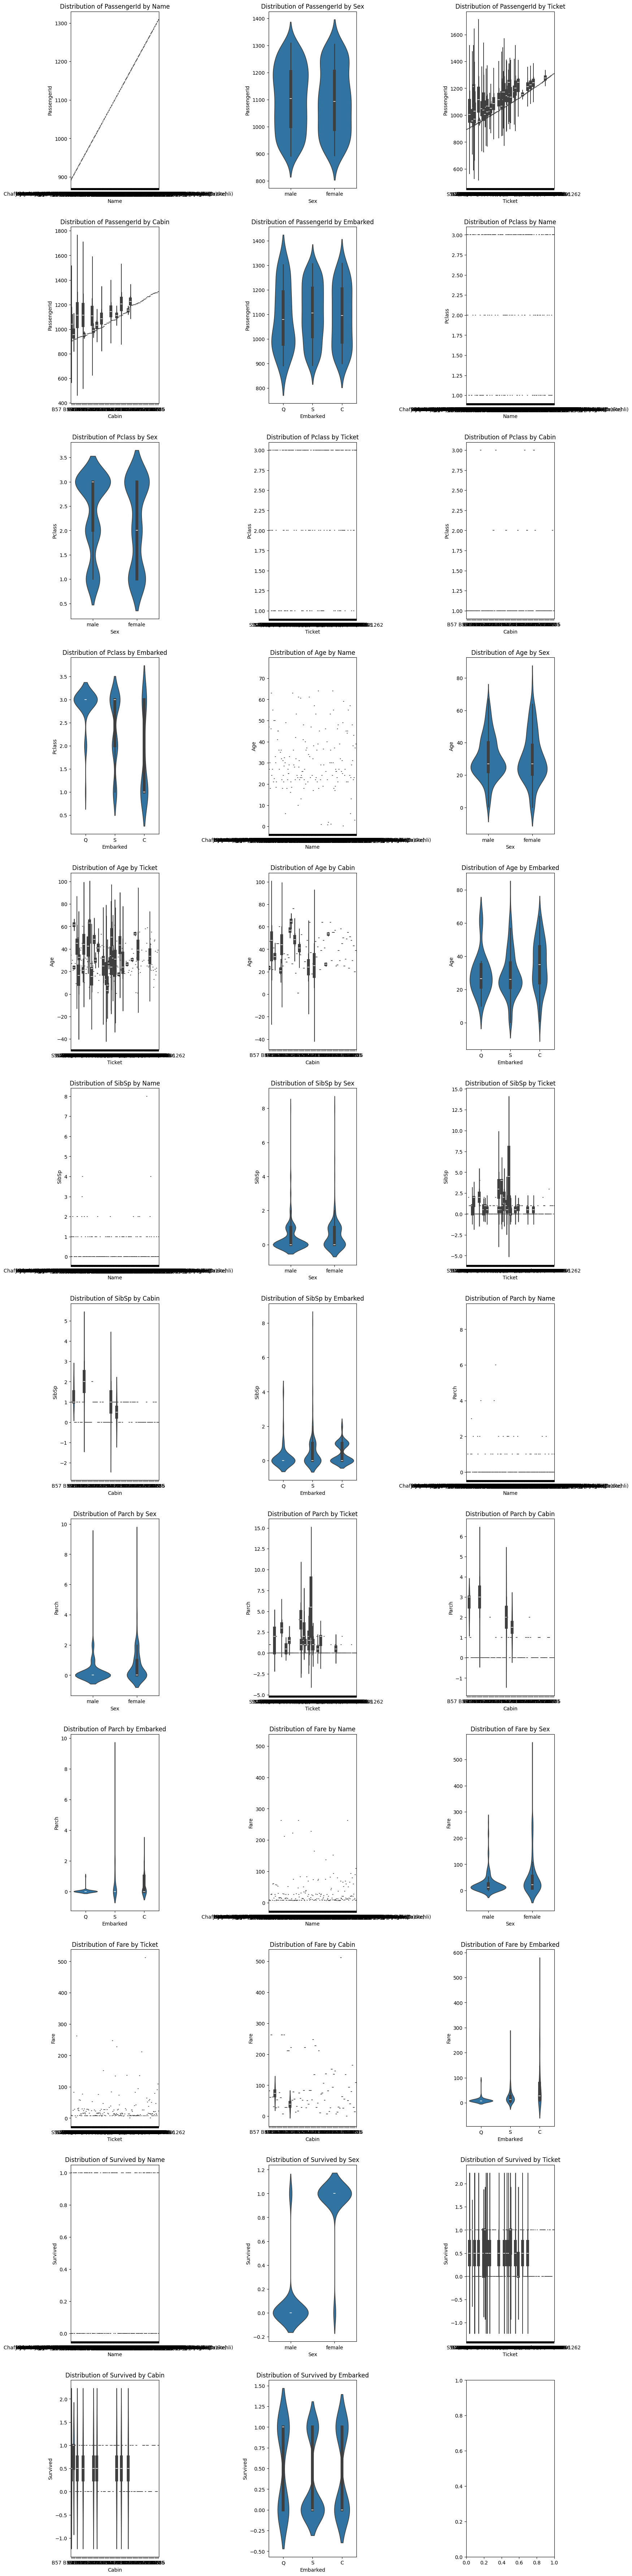

In [67]:
# Check if there are any categorical columns and numerical columns
if categorical_cols.size > 0 and numerical_cols.size > 0:
    # Create a figure with subplots
    num_rows = (len(numerical_cols) * len(categorical_cols) + 2) // 3
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axs = axs.flatten()

    # Iterate over combinations of numerical and categorical columns
    for i, (num_col, cat_col) in enumerate([(num, cat) for num in numerical_cols for cat in categorical_cols]):
        ax = axs[i]
        sns.violinplot(x=cat_col, y=num_col, data=data_set, ax=ax)
        ax.set_title(f'Distribution of {num_col} by {cat_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)

    # Adjust spacing between subplots
    fig.tight_layout(pad=3.0)

    # Display the plots
    plt.show()
elif len(categorical_cols) == 0:
    print("No categorical columns found in the dataset. Violin plots cannot be created.")
else:
    print("No numerical columns found in the dataset. Violin plots cannot be created.")

### **PAIR PLOTS FOR MULTIVARIATE ANALYSIS**

<Figure size 1200x1000 with 0 Axes>

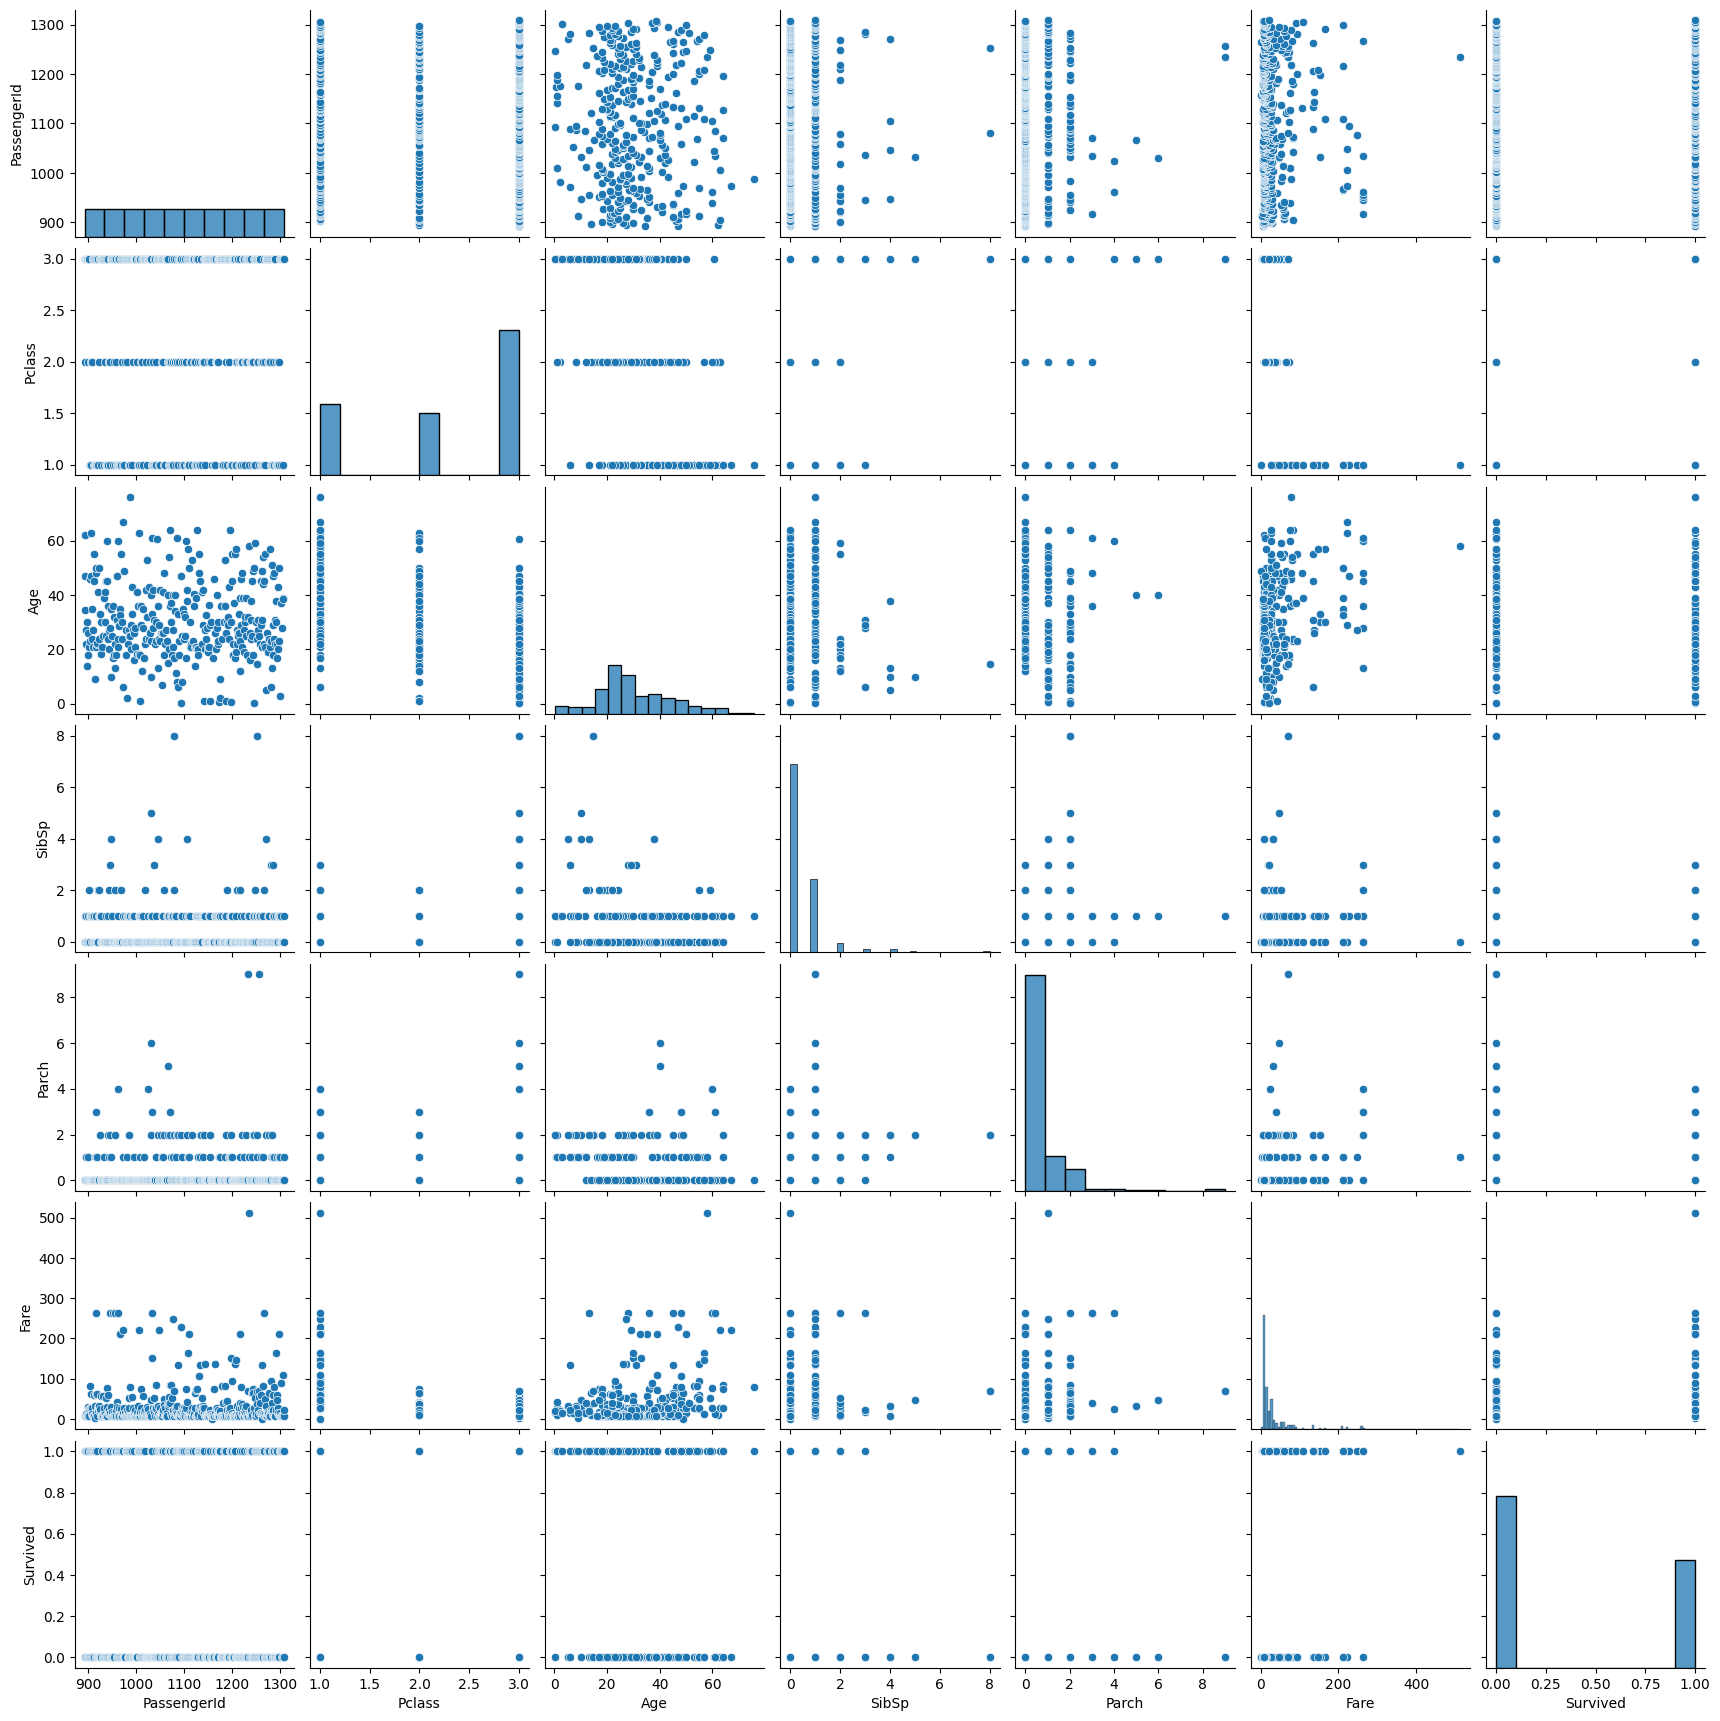

In [68]:
# Create a pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(data_set[numerical_cols])
plt.show()

## **STATISTICAL TECHNIQUES**

### **SKEWNESS AND KURTOSIS**

In [69]:
# Calculate skewness and kurtosis for numerical columns
skewness = data_set[numerical_cols].skew()
kurtosis = data_set[numerical_cols].kurt()

# Print the results
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
PassengerId    0.000000
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
Survived       0.473647
dtype: float64

Kurtosis:
PassengerId    -1.200000
Pclass         -1.382666
Age             0.083783
SibSp          26.498712
Parch          31.412513
Fare           17.921595
Survived       -1.784219
dtype: float64


### **HYPOTHESIS TESTING (ANOVA, & T-TEST)**

In [71]:
# Perform ANOVA
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        groups = data_set.groupby(cat_col)[num_col]
        group_data = [group for _, group in groups]
        f_value, p_value = stats.f_oneway(*group_data)
        print(f"\nANOVA for {num_col} by {cat_col}:")
        print(f"F-value: {f_value:.4f}, p-value: {p_value:.4f}")

# Perform t-tests
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        groups = data_set.groupby(cat_col)[num_col]
        if len(groups) == 2:
            group_names = list(groups.groups.keys())
            group1 = groups.get_group(group_names[0])
            group2 = groups.get_group(group_names[1])
            t_stat, p_value = stats.ttest_ind(group1, group2)
            print(f"\nT-test for {num_col} between {group_names[0]} and {group_names[1]}:")
            print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py


ANOVA for PassengerId by Name:
F-value: nan, p-value: nan

ANOVA for PassengerId by Sex:
F-value: 0.2249, p-value: 0.6356

ANOVA for PassengerId by Ticket:
F-value: 1.0590, p-value: 0.4101

ANOVA for PassengerId by Cabin:
F-value: 0.8863, p-value: 0.6528

ANOVA for PassengerId by Embarked:
F-value: 0.5243, p-value: 0.5923

ANOVA for Pclass by Name:
F-value: nan, p-value: nan

ANOVA for Pclass by Sex:
F-value: 4.9662, p-value: 0.0264

ANOVA for Pclass by Ticket:
F-value: inf, p-value: 0.0000

ANOVA for Pclass by Cabin:
F-value: inf, p-value: 0.0000

ANOVA for Pclass by Embarked:
F-value: 33.4045, p-value: 0.0000

ANOVA for Age by Name:
F-value: nan, p-value: nan

ANOVA for Age by Sex:
F-value: nan, p-value: nan

ANOVA for Age by Ticket:
F-value: nan, p-value: nan

ANOVA for Age by Cabin:
F-value: nan, p-value: nan

ANOVA for Age by Embarked:
F-value: nan, p-value: nan

ANOVA for SibSp by Name:
F-value: nan, p-value: nan

ANOVA for SibSp by Sex:
F-value: 4.1972, p-value: 0.0411

ANOVA f

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


# **DATA CLEANING AND PREPROCESSING**

### **HANDLE MISSING VALUES**

In [ ]:
# some code

### **REMOVE DUPLICATES**

In [ ]:
# some code

### **FIX STRUCTURAL ERRORS**

In [ ]:
# some code

### **ENCODE CATEGORICAL VARIABLES**

In [ ]:
# some code

### **NORMALISE/SCALE NUMERICAL DATA**

In [ ]:
# some code

### **HANDLE DATA TYPE INCONSISTENCIES**

In [ ]:
# some code

### **DATA VALIDIATION**

In [ ]:
# some code